<a href="https://colab.research.google.com/github/ftk1000/KGL/blob/master/moa_metric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# moa_metric.ipynb
# 2020.11.26
# MoA metric from https://www.youtube.com/watch?v=D7i67UT3O3o&feature=youtu.be

import numpy as np

def clip(x, eps = 1E-15):  
  return np.fmax(  np.fmin(x, 1.0-eps), eps  )

def my_log_loss(y, yht):
  yht_clipped = clip(yht)
  r = -np.sum(y*np.log(yht_clipped) + (1-y)*np.log(1-yht_clipped))/len(y)
  return r

from sklearn.metrics import log_loss

In [28]:
N=20 # number of targets - we will assume each target is a constant for all entry points
Y = TARGTES = np.random.randint(0,2,N)
print('TARGTES=Y=',TARGTES)

print('log_loss(Y,Y) = ',log_loss(Y,Y)  )
assert log_loss(Y,Y) == my_log_loss(Y,Y)

TARGTES=Y= [0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1]
log_loss(Y,Y) =  9.992007221626413e-16


In [33]:
NPred=10
print(f'here are {NPred} possible predictions')
yhats = predictions = np.arange(0,1.01,1/(NPred-1))
print('yhats=',yhats)

print('We select one of them and assume it is predicted value for each of the TARGETS=Y.')
preds = np.array([yhats[0]]*N)
print('So, we predict these values for Y : ',preds)
print('log_loss(Y,preds) = ',log_loss(Y,preds)  )
print('Q: do log_loss and my_log_loss match?   A:', log_loss(Y,preds) == my_log_loss(Y,preds) )
assert log_loss(Y,preds) == my_log_loss(Y,preds)

here are 10 possible predictions
yhats= [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
We select one of them and assume it is predicted value for each of the TARGETS=Y.
So, we predict these values for Y :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
log_loss(Y,preds) =  13.815510557964274
Q: do log_loss and my_log_loss match?   A: True


In [34]:
xs = [] 
ys = []
for yhat in  yhats:
  # print('yhat=',yhat)
  xs.append(yhat)
  ys.append( log_loss( Y, np.array([yhat]*N) ) )

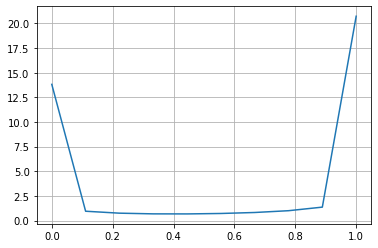

In [35]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
plt.plot(xs,ys)
plt.grid()